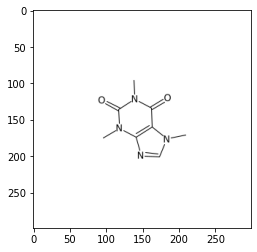

In [49]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('caffeine.png')
plt.imshow(img)

Using decimer package available at [this link](https://github.com/Kohulan/DECIMER-Image_Transformer). This package includes three different models:
- Canonical: Model trained on images depicted using canonical SMILES
- Isomeric: Model trained on images depicted using isomeric SMILES, which includes stereochemical information + ions
- Augmented: Model trained on images depicted using isomeric SMILES with augmentations

CN1C=NC2=C1C(=O)N(C)C(=O)N2C


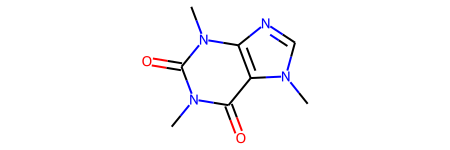

In [50]:
from decimer import DECIMER
from rdkit import Chem
model_name = "Isomeric"
img_path = "caffeine.png"
caffeine_smiles = DECIMER.predict_SMILES(img_path,model_name)
print(caffeine_smiles)
Chem.MolFromSmiles(caffeine_smiles)

Como sugirió Rocío, transformamos la codificación de smiles en selfies. Hay una herramienta para realizar esta transformación disponible en este [GitHub link](https://github.com/aspuru-guzik-group/selfies_tutorial).

In [51]:
from selfies import encoder
translation = encoder(caffeine_smiles)
print(translation)

[C][N][C][=N][C][=C][Ring1][Branch1_1][C][Branch1_2][C][=O][N][Branch1_1][C][C][C][Branch1_2][C][=O][N][Ring1][Branch2_2][C]


### Ejemplo 1

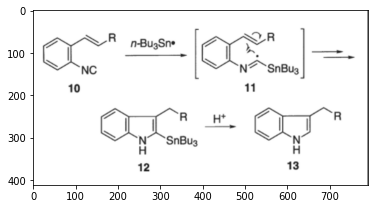

In [52]:
simple_mechanism = cv2.imread('test_images_pptx/12.2.png')
plt.imshow(simple_mechanism)

BrNC=CNNNNC=CNNNNNNNNNNNNNNCC
[Br][N][C][=C][N][N][N][N][C][=C][N][N][N][N][N][N][N][N][N][N][N][N][N][N][C][C]


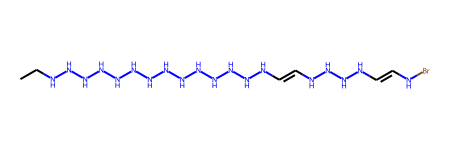

In [53]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C#CCOP(=S1)(O)NNCCNP(=S)(OCC#CSN1)ONC#CSS
[C][#C][C][O][P][Branch1_2][C][=S][Branch1_1][C][O][N][N][C][C][N][P][Branch1_2][C][=S][Branch1_1][Branch2_2][O][C][C][#C][S][N][Ring1][#C][O][N][C][#C][S][S]


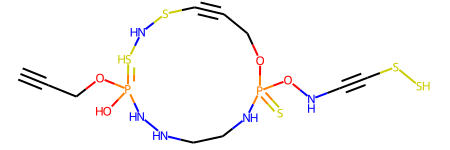

In [54]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

CNCC(O)POP(O)OP(N1P(CCP=CCP1)OS)OP(O)S
[C][N][C][C][Branch1_1][C][O][P][O][P][Branch1_1][C][O][O][P][Branch1_1][#C][N][P][Branch1_1][Branch2_2][C][C][P][=C][C][P][Ring1][Branch2_1][O][S][O][P][Branch1_1][C][O][S]


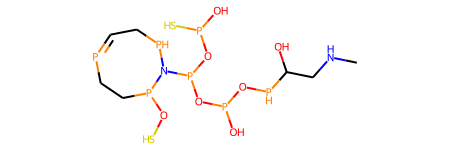

In [55]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

### Ejemplo 2

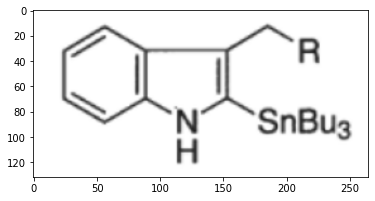

In [56]:
simple_molecule = cv2.imread('test_images_pptx/12.2_molecule.png')
plt.imshow(simple_molecule)

N=CNC=3C(=N)N=C1C=CC=CC1=CC=2C=CC=CC=2C=3CC=NO
[N][=C][N][C][C][Branch1_2][C][=N][N][=C][C][=C][C][=C][C][Ring1][Branch1_2][=C][C][C][=C][C][=C][C][Expl=Ring1][Branch1_2][C][Expl=Ring2][Ring1][C][C][C][=N][O]


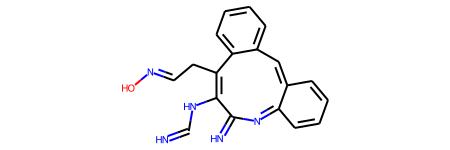

In [57]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C=C1C2=CC=C(C=C1)C=CC(=C(CC=NO)NC2=N)CC=N
[C][=C][C][=C][C][=C][Branch1_1][Branch1_1][C][=C][Ring1][Branch1_3][C][=C][C][Branch1_2][=N][=C][Branch1_1][Branch1_1][C][C][=N][O][N][C][Ring1][S][=N][C][C][=N]


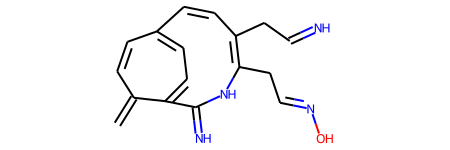

In [58]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

In [59]:
smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))
Chem.MolFromSmiles(smiles_code)

C1=CC=C2C(=C(C=C1)C=N3N2N=C3CCNNO)C=NO
[C][=C][C][=C][C][Branch2_2][Ring1][Branch1_2][=C][Branch1_1][Branch1_1][C][=C][Ring1][Branch2_1][C][=N][N][Ring1][Branch2_1][N][=C][Ring1][Ring2][C][C][N][N][O][C][=N][O]


RDKit ERROR: [13:13:44] Explicit valence for atom # 9 N, 4, is greater than permitted
[13:13:44] Explicit valence for atom # 9 N, 4, is greater than permitted


Como podemos ver, los resultados no son buenos. Vamos a probar con una imagen de mayor resolución. Sólo realizaremos experimentos utilizando la configuración `isométrica`, ya que es la que reconoce estructuras más complejas.

In [60]:
from rdkit.Chem import Draw

def plot_and_process(img_path, config):
    img = cv2.imread(img_path)
    plt.title("Imagen original")
    plt.imshow(img)

    smiles_code = DECIMER.predict_SMILES(img_path,config)
    print("Predicción:",smiles_code)
    result_img = Chem.MolFromSmiles(smiles_code)
    plt.figure()
    plt.title("Predicción")
    plt.imshow(Draw.MolToImage(result_img))

Predicción: [C@H](=N)COP(F)(F)(NNNP(=S)(F)NNN=O)S


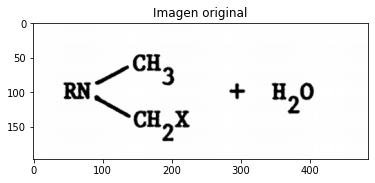

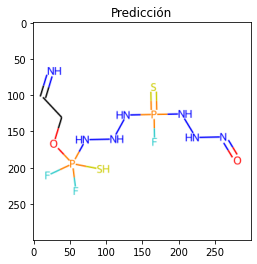

In [61]:
img_path = 'test_images_pptx/9_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')

Predicción: C[C@@]([C@](N=N)(N=N)ON(=O)NN=NN)ON


RDKit ERROR: [13:13:59] Explicit valence for atom # 8 N, 4, is greater than permitted
[13:13:59] Explicit valence for atom # 8 N, 4, is greater than permitted


ValueError: Null molecule provided

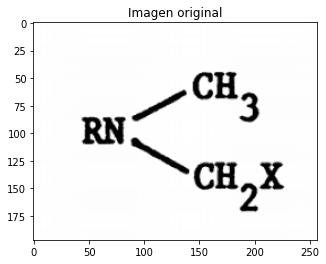

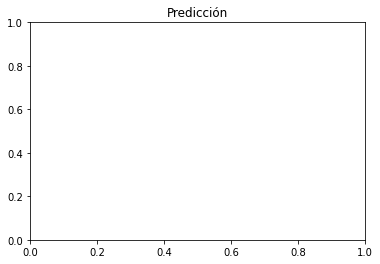

In [62]:
img_path = 'test_images_pptx/9_clean_molecule_2.png'
plot_and_process(img_path, 'Isomeric')

In [ ]:
img_path = 'test_images_pptx/9_clean.png'
plot_and_process(img_path, 'Isomeric')

In [ ]:
img_path = 'test_images_pptx/9.png'
plot_and_process(img_path, 'Isomeric')

Malos resultados. Intentemos de nuevo con otra imagen, más parecida a la que da como ejemplo la documentación.

In [ ]:
img_path = 'test_images_pptx/10_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')

Seguimos obteniendo unos resultados incorrectos. Debemos averiguar qué está ocurriendo. ¿Cón qué datasets es entrenado DECIMER?